___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import GridSearchCV

from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

C:\Users\solid\anaconda3\envs\tf_new\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv(r'C:\Users\solid\OneDrive\Desktop\SDA - ML\Assignment DL1\Churn_Modelling.csv')

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [7]:
print(df['Age'].describe())

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64


In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
print(df['Geography'].unique())

['France' 'Spain' 'Germany']


<Axes: xlabel='Geography', ylabel='count'>

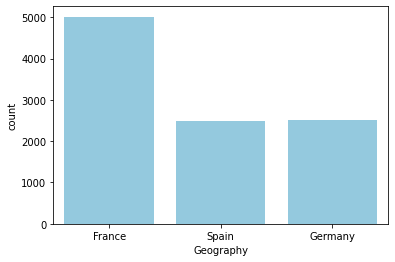

In [11]:
sns.countplot(x='Geography', data=df, color='skyblue')

Most number of coustmers are located in France, they are about 5000, almost half the cousterms in this dataset are from France.
Spain and Germany have the other half of this dataset, each about 2500 coustmers. 

C:\Users\solid\AppData\Local\Temp\ipykernel_17736\1010479429.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

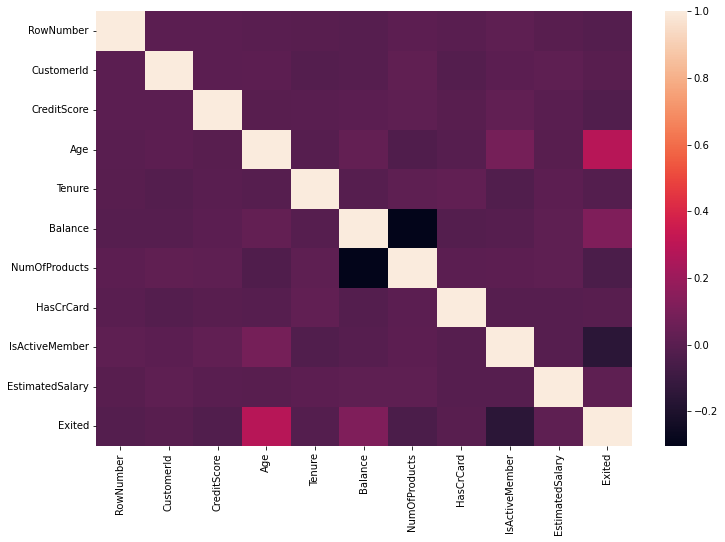

In [12]:
#Correlation plot
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr())

<Axes: xlabel='Exited', ylabel='count'>

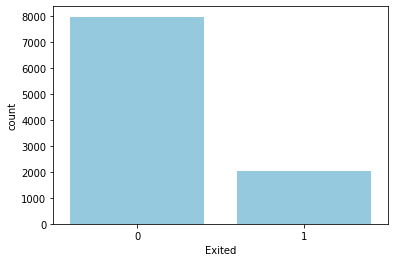

In [13]:
sns.countplot(x='Exited', data=df, color='skyblue')

We are dealing with an imbalanced dataset, as most cases of calassifications problems. There will be alot of tunning to get good results. 

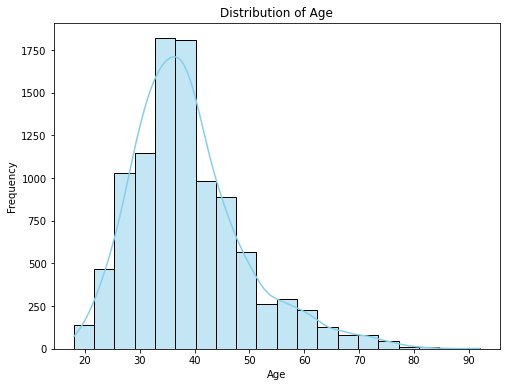

In [14]:
#sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))  
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')


plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.show()

We have somewhat left skewed distrbution, high precentage of coustmers are in their mid 30's and earely 40's.

In [15]:

exit_counts = df[df['Exited'] == 1].groupby(['Geography', 'Gender']).size().reset_index(name='ExitCount')


print(exit_counts)

  Geography  Gender  ExitCount
0    France  Female        460
1    France    Male        350
2   Germany  Female        448
3   Germany    Male        366
4     Spain  Female        231
5     Spain    Male        182


Number of females and males in each country are close to each other. This dataset represents them somewhat equally. Model will not be biased based on gender

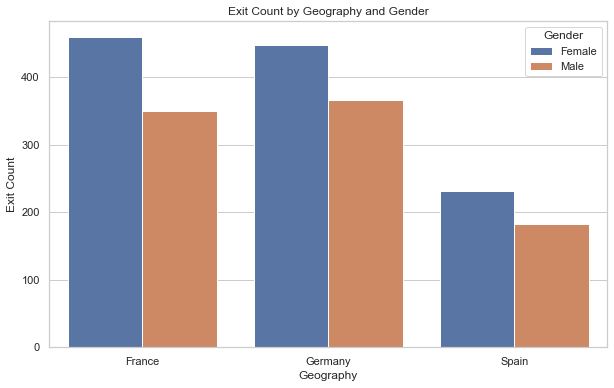

In [16]:
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.barplot(x='Geography', y='ExitCount', hue='Gender', data=exit_counts)


plt.xlabel('Geography')
plt.ylabel('Exit Count')
plt.title('Exit Count by Geography and Gender')
plt.show()

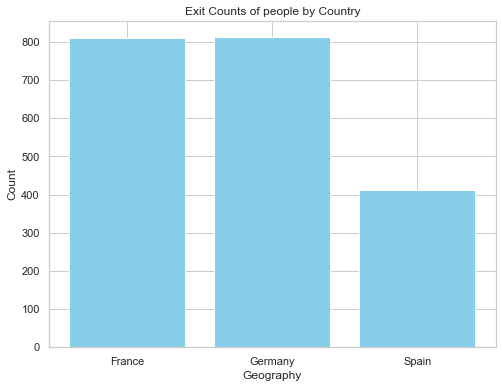

In [17]:
exit_counts = df[df['Exited'] == 1].groupby('Geography').size().reset_index(name='ExitCount')

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(exit_counts['Geography'], exit_counts['ExitCount'], color='skyblue')

# Add labels and title
plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Exit Counts of people by Country')

# Show the plot
plt.show()

Although Germany and France has equal number of coustmers, it looks that number of coustermes exited in Germany higher. 

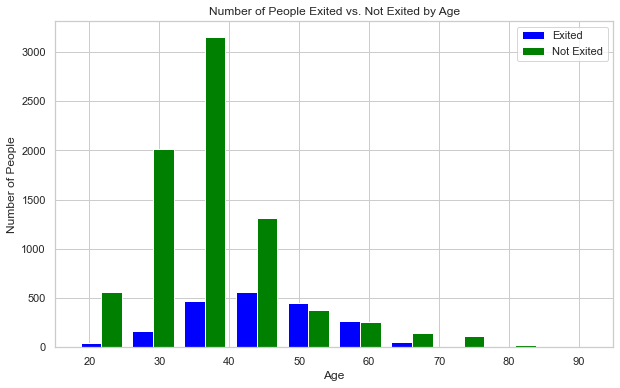

In [18]:

exited_data = df[df['Exited'] == 1]['Age']
not_exited_data = df[df['Exited'] == 0]['Age']

plt.figure(figsize=(10, 6))
plt.hist([exited_data, not_exited_data], bins=10, label=['Exited', 'Not Exited'], color=['blue', 'green'])
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Number of People Exited vs. Not Exited by Age')
plt.legend()
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

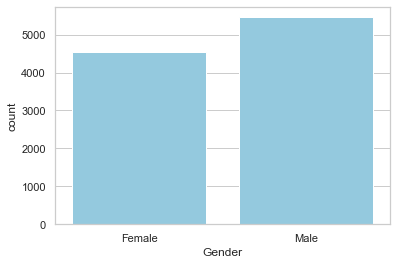

In [19]:
sns.countplot(x='Gender', data=df, color='skyblue')

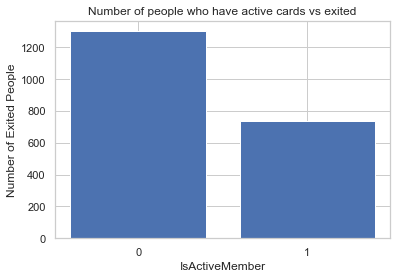

In [20]:
grouped_data = df.groupby('IsActiveMember')['Exited'].sum().reset_index()

plt.bar(grouped_data['IsActiveMember'], grouped_data['Exited'], tick_label=grouped_data['IsActiveMember'])
plt.xlabel('IsActiveMember')
plt.ylabel('Number of Exited People')
plt.title('Number of people who have active cards vs exited')
plt.show()

### Feature Engineering 

In [21]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

categorical_columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [22]:
# Dropping unneccery features 


columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df.drop(columns=columns_to_drop, inplace=True)
df.head(2)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [23]:
unique_geographies = df['Geography'].unique()
print(unique_geographies)

['France' 'Spain' 'Germany']


# Preprocessing of Data
- Train | Test Split, Scalling

In [24]:
X = df.drop('Exited', axis=1)
y= df['Exited']

In [25]:
# Encoding catigorical columns

Geography = pd.get_dummies(X['Geography'])
X = pd.concat([X, Geography], axis=1)
X = X.drop('Geography', axis=1)

In [26]:
Gender = pd.get_dummies(X['Gender'])
X = pd.concat([X, Gender], axis=1)
X = X.drop('Gender', axis=1)

In [27]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [28]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [29]:
X_train, X_test, y_train, y_test =train_test_split(X,y,stratify=y, test_size=0.15, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train,test_size=0.15, random_state=42)

In [30]:
print(X_train.shape)

(7225, 13)


In [32]:
scaler = MinMaxScaler()

In [33]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# Modelling & Model Performance

In [34]:
seed = 42
import os
import random
os.environ["TF_DETERMINISTIC_OPS"] = "1"
tf.keras.utils.set_random_seed(seed)
os.environ['PYTHONHASHSEED']=str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

### Create The Model

## without class_weigth

In [35]:
tf.random.set_seed(seed)

model = Sequential()
#model.add(Dense(64, activation = "relu", input_dim = X_train.shape[1]))
# For the input layer, best practice is to add neurons the same number of the features we have plus 1 for bias, but based on
# instructor notes that this neural netowrk is not deep i will make it as 32

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [36]:
# Train the model on the scaled training data
#history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=20, batch_size=32)
#model.fit(x=X_train, y=y_train, batch_size=32, epochs=200, verbose=1)

history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=200,
    verbose=1,
    validation_data=(X_val, y_val)  # we are using the val to avoid data leakage
)

#validation_split=0.1

Epoch 1/200
226/226 [==============================] - 4s 9ms/step - loss: 0.5299 - recall: 0.0394 - val_loss: 0.4681 - val_recall: 0.0000e+00
Epoch 2/200
226/226 [==============================] - 1s 5ms/step - loss: 0.4542 - recall: 0.0775 - val_loss: 0.4409 - val_recall: 0.1154
Epoch 3/200
226/226 [==============================] - 1s 5ms/step - loss: 0.4341 - recall: 0.1659 - val_loss: 0.4347 - val_recall: 0.3385
Epoch 4/200
226/226 [==============================] - 1s 5ms/step - loss: 0.4200 - recall: 0.2379 - val_loss: 0.4120 - val_recall: 0.2923
Epoch 5/200
226/226 [==============================] - 1s 5ms/step - loss: 0.4070 - recall: 0.2685 - val_loss: 0.4010 - val_recall: 0.3038
Epoch 6/200
226/226 [==============================] - 1s 5ms/step - loss: 0.3948 - recall: 0.3148 - val_loss: 0.3933 - val_recall: 0.3423
Epoch 7/200
226/226 [==============================] - 1s 5ms/step - loss: 0.3855 - recall: 0.3426 - val_loss: 0.3805 - val_recall: 0.3577
Epoch 8/200
226/226 [==

226/226 [==============================] - 1s 5ms/step - loss: 0.3228 - recall: 0.4990 - val_loss: 0.3303 - val_recall: 0.4500
Epoch 60/200
226/226 [==============================] - 1s 5ms/step - loss: 0.3195 - recall: 0.5031 - val_loss: 0.3340 - val_recall: 0.4577
Epoch 61/200
226/226 [==============================] - 1s 5ms/step - loss: 0.3238 - recall: 0.4827 - val_loss: 0.3290 - val_recall: 0.5000
Epoch 62/200
226/226 [==============================] - 1s 5ms/step - loss: 0.3189 - recall: 0.5031 - val_loss: 0.3371 - val_recall: 0.5423
Epoch 63/200
226/226 [==============================] - 1s 5ms/step - loss: 0.3202 - recall: 0.5173 - val_loss: 0.3305 - val_recall: 0.4846
Epoch 64/200
226/226 [==============================] - 1s 5ms/step - loss: 0.3196 - recall: 0.5031 - val_loss: 0.3322 - val_recall: 0.5000
Epoch 65/200
226/226 [==============================] - 1s 5ms/step - loss: 0.3194 - recall: 0.4976 - val_loss: 0.3335 - val_recall: 0.4962
Epoch 66/200
226/226 [===========

226/226 [==============================] - 1s 5ms/step - loss: 0.3080 - recall: 0.5187 - val_loss: 0.3342 - val_recall: 0.5000
Epoch 118/200
226/226 [==============================] - 1s 5ms/step - loss: 0.3082 - recall: 0.5146 - val_loss: 0.3361 - val_recall: 0.4962
Epoch 119/200
226/226 [==============================] - 1s 5ms/step - loss: 0.3066 - recall: 0.5173 - val_loss: 0.3465 - val_recall: 0.5462
Epoch 120/200
226/226 [==============================] - 1s 5ms/step - loss: 0.3056 - recall: 0.5275 - val_loss: 0.3413 - val_recall: 0.4692
Epoch 121/200
226/226 [==============================] - 1s 5ms/step - loss: 0.3070 - recall: 0.5173 - val_loss: 0.3359 - val_recall: 0.5192
Epoch 122/200
226/226 [==============================] - 1s 5ms/step - loss: 0.3060 - recall: 0.5262 - val_loss: 0.3439 - val_recall: 0.4269
Epoch 123/200
226/226 [==============================] - 1s 5ms/step - loss: 0.3071 - recall: 0.5262 - val_loss: 0.3397 - val_recall: 0.4423
Epoch 124/200
226/226 [====

226/226 [==============================] - 1s 5ms/step - loss: 0.2960 - recall: 0.5330 - val_loss: 0.3492 - val_recall: 0.5038
Epoch 176/200
226/226 [==============================] - 1s 5ms/step - loss: 0.2948 - recall: 0.5506 - val_loss: 0.3536 - val_recall: 0.4692
Epoch 177/200
226/226 [==============================] - 1s 5ms/step - loss: 0.2958 - recall: 0.5384 - val_loss: 0.3517 - val_recall: 0.4885
Epoch 178/200
226/226 [==============================] - 1s 5ms/step - loss: 0.2949 - recall: 0.5398 - val_loss: 0.3528 - val_recall: 0.4962
Epoch 179/200
226/226 [==============================] - 1s 5ms/step - loss: 0.2934 - recall: 0.5432 - val_loss: 0.3559 - val_recall: 0.4154
Epoch 180/200
226/226 [==============================] - 1s 5ms/step - loss: 0.2927 - recall: 0.5398 - val_loss: 0.3547 - val_recall: 0.4308
Epoch 181/200
226/226 [==============================] - 1s 5ms/step - loss: 0.2928 - recall: 0.5452 - val_loss: 0.3500 - val_recall: 0.5038
Epoch 182/200
226/226 [====

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 18)                594       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,223
Trainable params: 1,223
Non-trainable params: 0
_________________________________________________________________


In [38]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.529890,0.039429,0.468102,0.000000
1,0.454156,0.077498,0.440947,0.115385
2,0.434073,0.165874,0.434739,0.338462
3,0.420005,0.237933,0.411969,0.292308
4,0.406959,0.268525,0.401000,0.303846


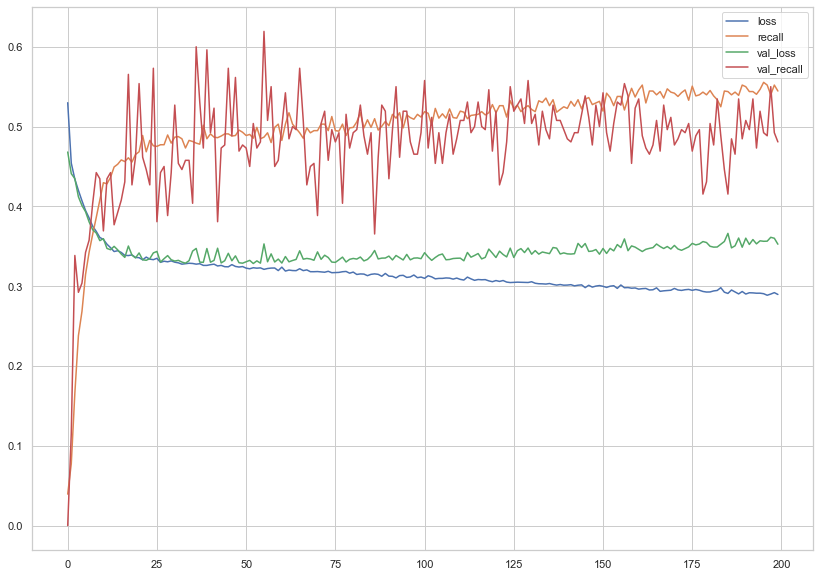

In [39]:
plt.rcParams["figure.figsize"] = (14,10)
loss_df.plot()
plt.show()

In [40]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
loss, accuracy

(0.3669425845146179, 0.4542483687400818)

In [41]:
print('Training Dataset')

y_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

print("Testing Dataset")
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Training Dataset
226/226 [==============================] - 1s 3ms/step
[[5620  134]
 [ 721  750]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      5754
           1       0.85      0.51      0.64      1471

    accuracy                           0.88      7225
   macro avg       0.87      0.74      0.78      7225
weighted avg       0.88      0.88      0.87      7225

Testing Dataset
47/47 [==============================] - 0s 3ms/step
[[1146   48]
 [ 167  139]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1194
           1       0.74      0.45      0.56       306

    accuracy                           0.86      1500
   macro avg       0.81      0.71      0.74      1500
weighted avg       0.85      0.86      0.84      1500



#### Recall score for class 1 is very low, which is expected since the model is biased to class 0. 

In [42]:
from sklearn.metrics import roc_curve, auc
y_pred = model.predict(X_val).ravel()

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc}")

40/40 [==============================] - 0s 4ms/step
AUC: 0.8549829480863964


AUC: 0.8549829480863964


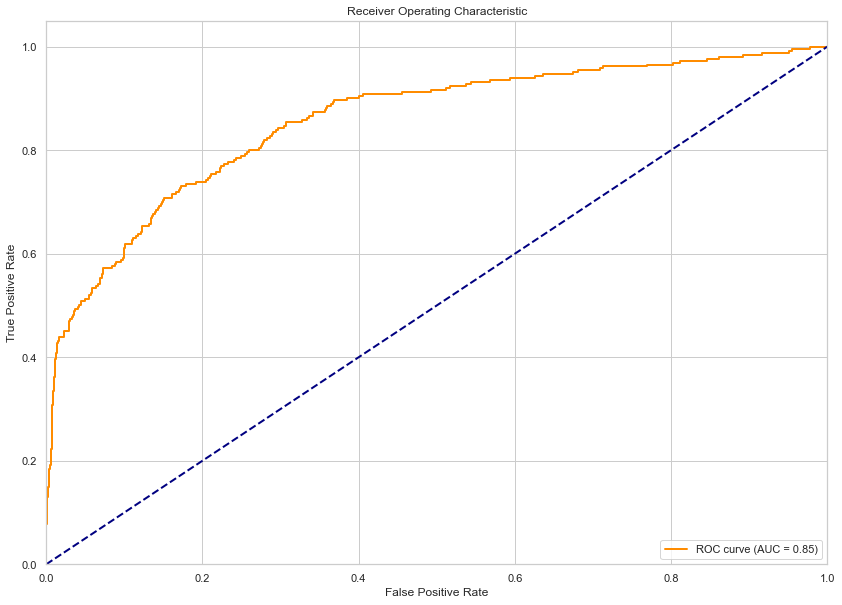

In [43]:
print(f"AUC: {roc_auc}")


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [44]:
tf.random.set_seed(seed)


model = Sequential()
model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))


In [45]:
class_weights = compute_class_weight('balanced', 
                                     classes=[0, 1], y=y_train) # balanced condition will assign greater value for the minority class
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}  # This will prevent the model to be biase the majority class, which is class 0
class_weights


array([0.62782412, 2.45581237])

In [46]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [47]:
# Training the model with class weights
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=200,
    verbose=1,
    validation_data=(X_val, y_val),
    class_weight=class_weight_dict  
)


Epoch 1/200
226/226 [==============================] - 4s 10ms/step - loss: 0.6560 - recall: 0.7478 - val_loss: 0.6204 - val_recall: 0.6538
Epoch 2/200
226/226 [==============================] - 1s 5ms/step - loss: 0.5956 - recall: 0.6778 - val_loss: 0.5607 - val_recall: 0.6654
Epoch 3/200
226/226 [==============================] - 1s 5ms/step - loss: 0.5676 - recall: 0.6948 - val_loss: 0.6685 - val_recall: 0.7846
Epoch 4/200
226/226 [==============================] - 1s 5ms/step - loss: 0.5481 - recall: 0.7124 - val_loss: 0.5519 - val_recall: 0.7269
Epoch 5/200
226/226 [==============================] - 1s 5ms/step - loss: 0.5249 - recall: 0.7233 - val_loss: 0.5142 - val_recall: 0.7077
Epoch 6/200
226/226 [==============================] - 1s 5ms/step - loss: 0.5041 - recall: 0.7410 - val_loss: 0.4579 - val_recall: 0.6462
Epoch 7/200
226/226 [==============================] - 1s 5ms/step - loss: 0.4948 - recall: 0.7315 - val_loss: 0.4775 - val_recall: 0.7385
Epoch 8/200
226/226 [=====

226/226 [==============================] - 1s 5ms/step - loss: 0.4296 - recall: 0.7831 - val_loss: 0.4133 - val_recall: 0.7308
Epoch 60/200
226/226 [==============================] - 1s 5ms/step - loss: 0.4259 - recall: 0.7831 - val_loss: 0.4305 - val_recall: 0.7346
Epoch 61/200
226/226 [==============================] - 1s 5ms/step - loss: 0.4284 - recall: 0.7757 - val_loss: 0.4173 - val_recall: 0.7269
Epoch 62/200
226/226 [==============================] - 1s 5ms/step - loss: 0.4231 - recall: 0.7872 - val_loss: 0.5167 - val_recall: 0.8115
Epoch 63/200
226/226 [==============================] - 1s 5ms/step - loss: 0.4243 - recall: 0.7859 - val_loss: 0.4714 - val_recall: 0.7885
Epoch 64/200
226/226 [==============================] - 1s 5ms/step - loss: 0.4253 - recall: 0.7852 - val_loss: 0.4953 - val_recall: 0.7962
Epoch 65/200
226/226 [==============================] - 1s 5ms/step - loss: 0.4251 - recall: 0.7831 - val_loss: 0.4670 - val_recall: 0.7692
Epoch 66/200
226/226 [===========

226/226 [==============================] - 1s 5ms/step - loss: 0.4023 - recall: 0.8069 - val_loss: 0.4454 - val_recall: 0.7423
Epoch 118/200
226/226 [==============================] - 1s 5ms/step - loss: 0.4022 - recall: 0.8029 - val_loss: 0.4454 - val_recall: 0.7192
Epoch 119/200
226/226 [==============================] - 1s 5ms/step - loss: 0.3999 - recall: 0.8090 - val_loss: 0.5087 - val_recall: 0.7769
Epoch 120/200
226/226 [==============================] - 1s 5ms/step - loss: 0.4008 - recall: 0.8042 - val_loss: 0.4010 - val_recall: 0.6615
Epoch 121/200
226/226 [==============================] - 1s 5ms/step - loss: 0.4023 - recall: 0.8029 - val_loss: 0.4512 - val_recall: 0.7385
Epoch 122/200
226/226 [==============================] - 1s 5ms/step - loss: 0.3998 - recall: 0.8097 - val_loss: 0.4239 - val_recall: 0.7038
Epoch 123/200
226/226 [==============================] - 1s 6ms/step - loss: 0.4002 - recall: 0.7947 - val_loss: 0.4802 - val_recall: 0.7500
Epoch 124/200
226/226 [====

226/226 [==============================] - 1s 5ms/step - loss: 0.3827 - recall: 0.8273 - val_loss: 0.4744 - val_recall: 0.7538
Epoch 176/200
226/226 [==============================] - 1s 5ms/step - loss: 0.3822 - recall: 0.8219 - val_loss: 0.4628 - val_recall: 0.7192
Epoch 177/200
226/226 [==============================] - 1s 6ms/step - loss: 0.3813 - recall: 0.8178 - val_loss: 0.4345 - val_recall: 0.7115
Epoch 178/200
226/226 [==============================] - 1s 5ms/step - loss: 0.3812 - recall: 0.8171 - val_loss: 0.4433 - val_recall: 0.7192
Epoch 179/200
226/226 [==============================] - 1s 5ms/step - loss: 0.3811 - recall: 0.8253 - val_loss: 0.4414 - val_recall: 0.7115
Epoch 180/200
226/226 [==============================] - 1s 5ms/step - loss: 0.3806 - recall: 0.8199 - val_loss: 0.3955 - val_recall: 0.6538
Epoch 181/200
226/226 [==============================] - 1s 5ms/step - loss: 0.3801 - recall: 0.8185 - val_loss: 0.4554 - val_recall: 0.7269
Epoch 182/200
226/226 [====

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                448       
                                                                 
 dense_5 (Dense)             (None, 18)                594       
                                                                 
 dense_6 (Dense)             (None, 9)                 171       
                                                                 
 dense_7 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,223
Trainable params: 1,223
Non-trainable params: 0
_________________________________________________________________


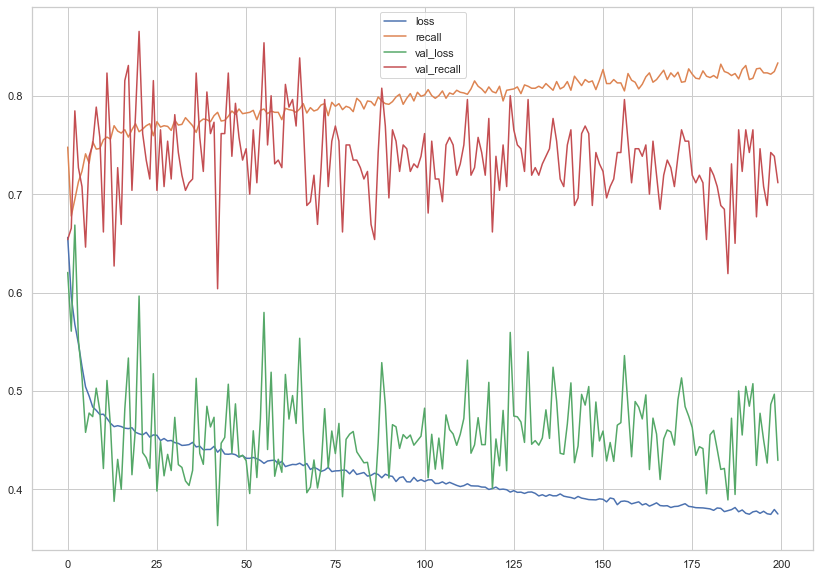

In [49]:
plt.rcParams["figure.figsize"] = (14,10)
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [50]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
loss, accuracy

(0.4622422754764557, 0.6830065250396729)

After adding class weights Loss value increased, accuracy decreased 

In [51]:
print('Training Dataset')
y_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))


print("Testing Dataset")
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


#y_pred = model.predict(X_test) > 0.5
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

Training Dataset
226/226 [==============================] - 1s 3ms/step
[[4903  851]
 [ 284 1187]]
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      5754
           1       0.58      0.81      0.68      1471

    accuracy                           0.84      7225
   macro avg       0.76      0.83      0.79      7225
weighted avg       0.87      0.84      0.85      7225

Testing Dataset
47/47 [==============================] - 0s 4ms/step
[[975 219]
 [ 97 209]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1194
           1       0.49      0.68      0.57       306

    accuracy                           0.79      1500
   macro avg       0.70      0.75      0.72      1500
weighted avg       0.82      0.79      0.80      1500



#### Recall for Class 1 increased after adding weights to classes, increased from 45 to 68

In [52]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Make predictions on the validation set
y_pred = model.predict(X_val).ravel()


fpr, tpr, _ = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc}")

40/40 [==============================] - 0s 4ms/step
AUC: 0.8423039029935582


AUC: 0.8423039029935582


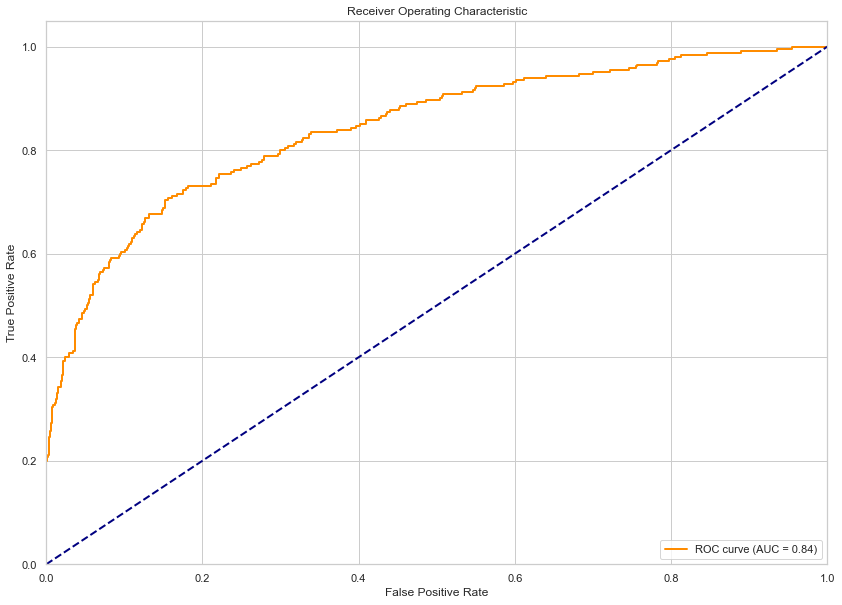

In [53]:
print(f"AUC: {roc_auc}")


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [54]:
tf.random.set_seed(seed)
#Default is 0.001
higher_learning_rate = 0.005

model = Sequential()
model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [55]:
class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

In [56]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=higher_learning_rate),
              loss="binary_crossentropy",
              metrics=["Recall"])

In [57]:
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=200,
    verbose=1,
    validation_data=(X_val, y_val),
    class_weight=class_weight_dict
)

Epoch 1/200
226/226 [==============================] - 4s 8ms/step - loss: 0.6537 - recall: 0.5330 - val_loss: 0.5164 - val_recall: 0.5846
Epoch 2/200
226/226 [==============================] - 1s 5ms/step - loss: 0.5785 - recall: 0.7396 - val_loss: 0.5444 - val_recall: 0.7731
Epoch 3/200
226/226 [==============================] - 1s 5ms/step - loss: 0.5326 - recall: 0.7648 - val_loss: 0.6607 - val_recall: 0.8769
Epoch 4/200
226/226 [==============================] - 1s 5ms/step - loss: 0.5190 - recall: 0.7587 - val_loss: 0.5476 - val_recall: 0.8154
Epoch 5/200
226/226 [==============================] - 1s 5ms/step - loss: 0.4947 - recall: 0.7505 - val_loss: 0.4648 - val_recall: 0.7462
Epoch 6/200
226/226 [==============================] - 1s 5ms/step - loss: 0.4819 - recall: 0.7444 - val_loss: 0.4671 - val_recall: 0.7077
Epoch 7/200
226/226 [==============================] - 1s 5ms/step - loss: 0.4753 - recall: 0.7417 - val_loss: 0.4686 - val_recall: 0.7462
Epoch 8/200
226/226 [======

226/226 [==============================] - 1s 5ms/step - loss: 0.4197 - recall: 0.7940 - val_loss: 0.4204 - val_recall: 0.7538
Epoch 60/200
226/226 [==============================] - 1s 5ms/step - loss: 0.4098 - recall: 0.7927 - val_loss: 0.4606 - val_recall: 0.7538
Epoch 61/200
226/226 [==============================] - 1s 5ms/step - loss: 0.4172 - recall: 0.7974 - val_loss: 0.4174 - val_recall: 0.7077
Epoch 62/200
226/226 [==============================] - 1s 5ms/step - loss: 0.4115 - recall: 0.7784 - val_loss: 0.5088 - val_recall: 0.8308
Epoch 63/200
226/226 [==============================] - 1s 5ms/step - loss: 0.4112 - recall: 0.8008 - val_loss: 0.4505 - val_recall: 0.7308
Epoch 64/200
226/226 [==============================] - 1s 5ms/step - loss: 0.4109 - recall: 0.7831 - val_loss: 0.4697 - val_recall: 0.7385
Epoch 65/200
226/226 [==============================] - 1s 5ms/step - loss: 0.4089 - recall: 0.7886 - val_loss: 0.4730 - val_recall: 0.7654
Epoch 66/200
226/226 [===========

226/226 [==============================] - 1s 5ms/step - loss: 0.3819 - recall: 0.8287 - val_loss: 0.4656 - val_recall: 0.7346
Epoch 118/200
226/226 [==============================] - 1s 5ms/step - loss: 0.3801 - recall: 0.8232 - val_loss: 0.4735 - val_recall: 0.7577
Epoch 119/200
226/226 [==============================] - 1s 5ms/step - loss: 0.3766 - recall: 0.8239 - val_loss: 0.4700 - val_recall: 0.7769
Epoch 120/200
226/226 [==============================] - 1s 5ms/step - loss: 0.3808 - recall: 0.8273 - val_loss: 0.4606 - val_recall: 0.7038
Epoch 121/200
226/226 [==============================] - 1s 5ms/step - loss: 0.3752 - recall: 0.8205 - val_loss: 0.4454 - val_recall: 0.7192
Epoch 122/200
226/226 [==============================] - 1s 5ms/step - loss: 0.3763 - recall: 0.8246 - val_loss: 0.4808 - val_recall: 0.7231
Epoch 123/200
226/226 [==============================] - 1s 5ms/step - loss: 0.3830 - recall: 0.8144 - val_loss: 0.4888 - val_recall: 0.7962
Epoch 124/200
226/226 [====

226/226 [==============================] - 1s 5ms/step - loss: 0.3606 - recall: 0.8368 - val_loss: 0.4855 - val_recall: 0.7192
Epoch 176/200
226/226 [==============================] - 1s 5ms/step - loss: 0.3582 - recall: 0.8382 - val_loss: 0.5031 - val_recall: 0.7038
Epoch 177/200
226/226 [==============================] - 1s 6ms/step - loss: 0.3589 - recall: 0.8362 - val_loss: 0.4977 - val_recall: 0.7385
Epoch 178/200
226/226 [==============================] - 1s 5ms/step - loss: 0.3567 - recall: 0.8341 - val_loss: 0.4825 - val_recall: 0.7077
Epoch 179/200
226/226 [==============================] - 1s 5ms/step - loss: 0.3548 - recall: 0.8409 - val_loss: 0.5050 - val_recall: 0.7346
Epoch 180/200
226/226 [==============================] - 1s 5ms/step - loss: 0.3611 - recall: 0.8484 - val_loss: 0.4726 - val_recall: 0.7000
Epoch 181/200
226/226 [==============================] - 1s 5ms/step - loss: 0.3608 - recall: 0.8355 - val_loss: 0.5109 - val_recall: 0.7731
Epoch 182/200
226/226 [====

In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                448       
                                                                 
 dense_9 (Dense)             (None, 18)                594       
                                                                 
 dense_10 (Dense)            (None, 9)                 171       
                                                                 
 dense_11 (Dense)            (None, 1)                 10        
                                                                 
Total params: 1,223
Trainable params: 1,223
Non-trainable params: 0
_________________________________________________________________


<Axes: >

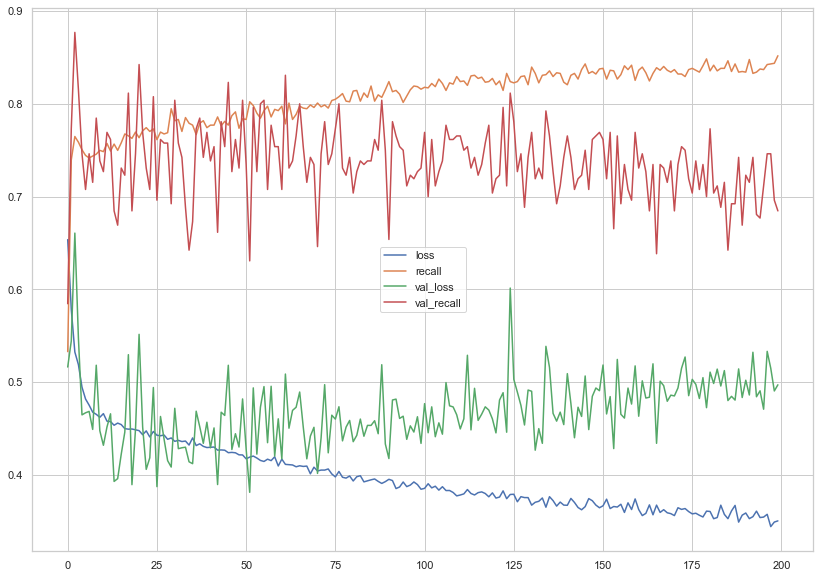

In [59]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [60]:
print('Training Dataset')
y_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))


print("Testing Dataset")
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Training Dataset
226/226 [==============================] - 1s 3ms/step
[[4761  993]
 [ 242 1229]]
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      5754
           1       0.55      0.84      0.67      1471

    accuracy                           0.83      7225
   macro avg       0.75      0.83      0.78      7225
weighted avg       0.87      0.83      0.84      7225

Testing Dataset
47/47 [==============================] - 0s 3ms/step
[[929 265]
 [ 89 217]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1194
           1       0.45      0.71      0.55       306

    accuracy                           0.76      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.82      0.76      0.78      1500



#### Slight increase for class 1 recall after increasing the learning rate from 0.001 to 0.005

In [61]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
loss, accuracy

(0.5863884091377258, 0.7091503143310547)

In [62]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Make predictions on the validation set
y_pred = model.predict(X_val).ravel()

fpr, tpr, _ = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc}")

40/40 [==============================] - 0s 3ms/step
AUC: 0.8242023493747632


AUC: 0.8242023493747632


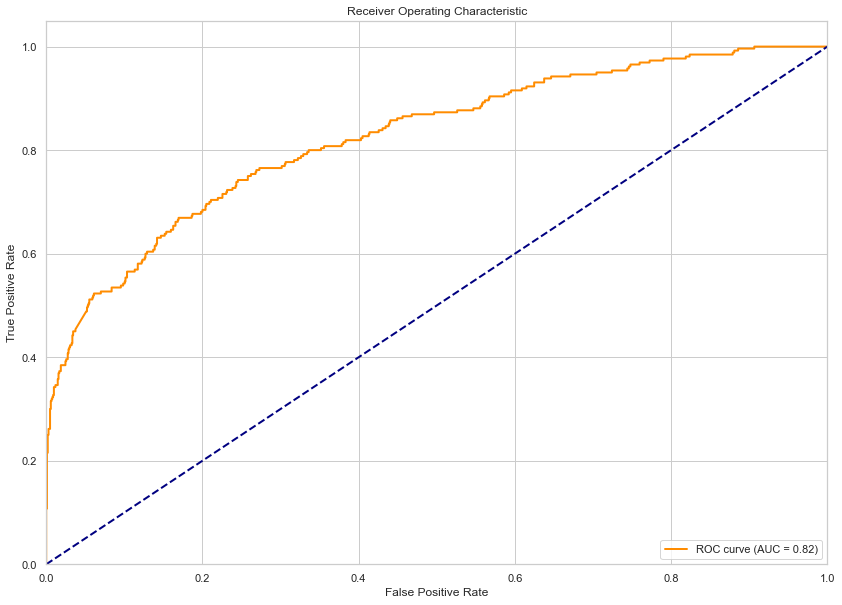

In [63]:
print(f"AUC: {roc_auc}")


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Add Dropout Layer

In [64]:
tf.random.set_seed(seed)

# Create a Sequential model
model = Sequential()
model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))


model.add(Dropout(0.3)) # Since we don't have a very deep NN, we will choose this value rather than 0.5

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.1))  

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.1)) 

model.add(Dense(1, activation="sigmoid"))


class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}


In [65]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),  
    loss="binary_crossentropy",
    metrics=["Recall"])

In [66]:
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=200,
    verbose=1,
    validation_data=(X_val, y_val),
    class_weight=class_weight_dict
)

Epoch 1/200
226/226 [==============================] - 4s 9ms/step - loss: 0.6601 - recall: 0.5914 - val_loss: 0.6197 - val_recall: 0.6769
Epoch 2/200
226/226 [==============================] - 1s 6ms/step - loss: 0.6122 - recall: 0.6696 - val_loss: 0.5752 - val_recall: 0.6615
Epoch 3/200
226/226 [==============================] - 1s 5ms/step - loss: 0.5893 - recall: 0.6581 - val_loss: 0.6564 - val_recall: 0.7846
Epoch 4/200
226/226 [==============================] - 1s 6ms/step - loss: 0.5704 - recall: 0.7036 - val_loss: 0.5809 - val_recall: 0.8077
Epoch 5/200
226/226 [==============================] - 1s 6ms/step - loss: 0.5483 - recall: 0.7226 - val_loss: 0.4908 - val_recall: 0.6654
Epoch 6/200
226/226 [==============================] - 1s 6ms/step - loss: 0.5377 - recall: 0.7070 - val_loss: 0.4773 - val_recall: 0.7500
Epoch 7/200
226/226 [==============================] - 1s 6ms/step - loss: 0.5263 - recall: 0.7288 - val_loss: 0.4582 - val_recall: 0.7115
Epoch 8/200
226/226 [======

226/226 [==============================] - 1s 6ms/step - loss: 0.4742 - recall: 0.7478 - val_loss: 0.4507 - val_recall: 0.7923
Epoch 60/200
226/226 [==============================] - 1s 6ms/step - loss: 0.4713 - recall: 0.7485 - val_loss: 0.4559 - val_recall: 0.7654
Epoch 61/200
226/226 [==============================] - 1s 5ms/step - loss: 0.4751 - recall: 0.7532 - val_loss: 0.4361 - val_recall: 0.7308
Epoch 62/200
226/226 [==============================] - 1s 5ms/step - loss: 0.4725 - recall: 0.7614 - val_loss: 0.5138 - val_recall: 0.8308
Epoch 63/200
226/226 [==============================] - 1s 5ms/step - loss: 0.4788 - recall: 0.7505 - val_loss: 0.4484 - val_recall: 0.7808
Epoch 64/200
226/226 [==============================] - 1s 6ms/step - loss: 0.4762 - recall: 0.7376 - val_loss: 0.4468 - val_recall: 0.7423
Epoch 65/200
226/226 [==============================] - 1s 6ms/step - loss: 0.4770 - recall: 0.7254 - val_loss: 0.5016 - val_recall: 0.7846
Epoch 66/200
226/226 [===========

226/226 [==============================] - 2s 9ms/step - loss: 0.4689 - recall: 0.7369 - val_loss: 0.4609 - val_recall: 0.7462
Epoch 118/200
226/226 [==============================] - 2s 8ms/step - loss: 0.4670 - recall: 0.7424 - val_loss: 0.4409 - val_recall: 0.7615
Epoch 119/200
226/226 [==============================] - 3s 15ms/step - loss: 0.4653 - recall: 0.7274 - val_loss: 0.4640 - val_recall: 0.7538
Epoch 120/200
226/226 [==============================] - 3s 12ms/step - loss: 0.4562 - recall: 0.7498 - val_loss: 0.4211 - val_recall: 0.7423
Epoch 121/200
226/226 [==============================] - 2s 7ms/step - loss: 0.4655 - recall: 0.7424 - val_loss: 0.4736 - val_recall: 0.7885
Epoch 122/200
226/226 [==============================] - 1s 6ms/step - loss: 0.4651 - recall: 0.7403 - val_loss: 0.4308 - val_recall: 0.7308
Epoch 123/200
226/226 [==============================] - 2s 7ms/step - loss: 0.4619 - recall: 0.7390 - val_loss: 0.4398 - val_recall: 0.7615
Epoch 124/200
226/226 [==

226/226 [==============================] - 1s 6ms/step - loss: 0.4575 - recall: 0.7498 - val_loss: 0.4249 - val_recall: 0.7346
Epoch 176/200
226/226 [==============================] - 1s 6ms/step - loss: 0.4639 - recall: 0.7349 - val_loss: 0.4331 - val_recall: 0.7462
Epoch 177/200
226/226 [==============================] - 1s 6ms/step - loss: 0.4604 - recall: 0.7417 - val_loss: 0.4753 - val_recall: 0.7769
Epoch 178/200
226/226 [==============================] - 1s 6ms/step - loss: 0.4615 - recall: 0.7192 - val_loss: 0.4214 - val_recall: 0.7308
Epoch 179/200
226/226 [==============================] - 1s 6ms/step - loss: 0.4632 - recall: 0.7349 - val_loss: 0.4379 - val_recall: 0.7654
Epoch 180/200
226/226 [==============================] - 1s 5ms/step - loss: 0.4625 - recall: 0.7471 - val_loss: 0.4078 - val_recall: 0.7308
Epoch 181/200
226/226 [==============================] - 1s 6ms/step - loss: 0.4576 - recall: 0.7362 - val_loss: 0.4970 - val_recall: 0.7885
Epoch 182/200
226/226 [====

In [67]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                448       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 18)                594       
                                                                 
 dropout_1 (Dropout)         (None, 18)                0         
                                                                 
 dense_14 (Dense)            (None, 9)                 171       
                                                                 
 dropout_2 (Dropout)         (None, 9)                 0         
                                                                 
 dense_15 (Dense)            (None, 1)                

<Axes: >

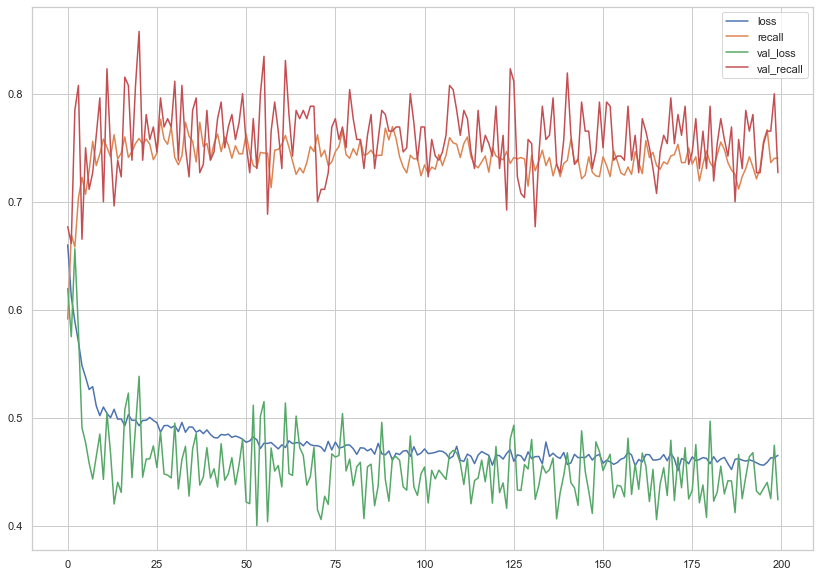

In [68]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [69]:
print('Training Dataset')
y_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))


print("Testing Dataset")
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Training Dataset
226/226 [==============================] - 1s 3ms/step
[[4834  920]
 [ 373 1098]]
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      5754
           1       0.54      0.75      0.63      1471

    accuracy                           0.82      7225
   macro avg       0.74      0.79      0.76      7225
weighted avg       0.85      0.82      0.83      7225

Testing Dataset
47/47 [==============================] - 0s 4ms/step
[[983 211]
 [ 89 217]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1194
           1       0.51      0.71      0.59       306

    accuracy                           0.80      1500
   macro avg       0.71      0.77      0.73      1500
weighted avg       0.83      0.80      0.81      1500



#### Recall for class 1 is the same even after adding dropout layer, on the other hand we notice an increase of precision of class 1 from 45 to 51.

In [70]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
loss, accuracy

(0.4457608163356781, 0.7091503143310547)

In [71]:
from sklearn.metrics import roc_curve, auc, roc_auc_score


y_pred = model.predict(X_val).ravel()

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc}")

40/40 [==============================] - 0s 4ms/step
AUC: 0.860106100795756


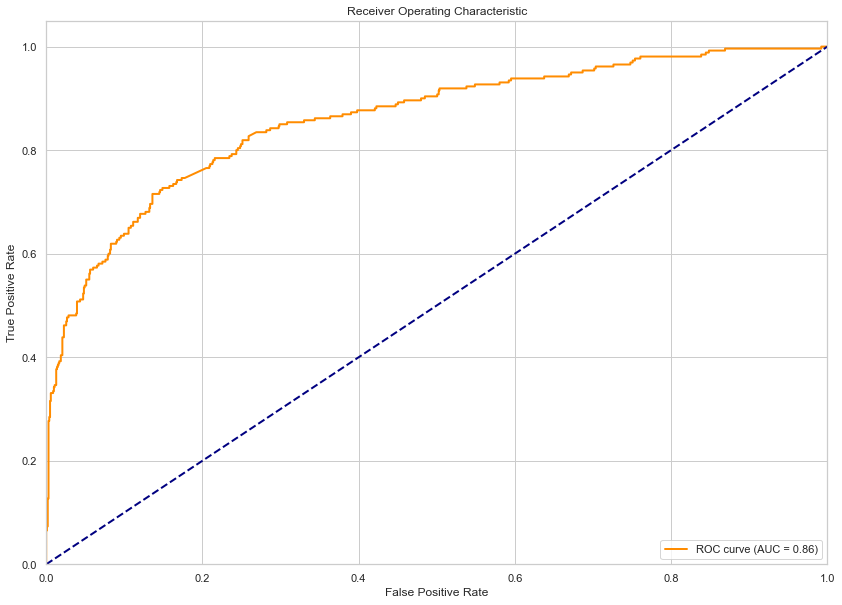

In [72]:
#print(f"AUC: {roc_auc}")


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Add Early Stop

#### Monitor the "val_loss" as metric

In [73]:
tf.random.set_seed(seed)


model = Sequential()

model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.3))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(1, activation="sigmoid"))


class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
    loss="binary_crossentropy",
    metrics=["Recall"]
)

In [74]:
# Early stopping callback
# Monitor the "val_loss" as metric
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=30,
    mode = "min",
    restore_best_weights=True  
)


In [75]:
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=200,
    verbose=1,
    validation_data=(X_val, y_val),
    class_weight=class_weight_dict,
    callbacks=[early_stopping]  
)



Epoch 1/200
226/226 [==============================] - 4s 9ms/step - loss: 0.6513 - recall: 0.6016 - val_loss: 0.5979 - val_recall: 0.6423
Epoch 2/200
226/226 [==============================] - 1s 6ms/step - loss: 0.6122 - recall: 0.6581 - val_loss: 0.5627 - val_recall: 0.6269
Epoch 3/200
226/226 [==============================] - 1s 6ms/step - loss: 0.5942 - recall: 0.6479 - val_loss: 0.6442 - val_recall: 0.7615
Epoch 4/200
226/226 [==============================] - 1s 6ms/step - loss: 0.5712 - recall: 0.7050 - val_loss: 0.5748 - val_recall: 0.7962
Epoch 5/200
226/226 [==============================] - 1s 6ms/step - loss: 0.5534 - recall: 0.7301 - val_loss: 0.5206 - val_recall: 0.6885
Epoch 6/200
226/226 [==============================] - 1s 6ms/step - loss: 0.5487 - recall: 0.6982 - val_loss: 0.4930 - val_recall: 0.7346
Epoch 7/200
226/226 [==============================] - 1s 6ms/step - loss: 0.5362 - recall: 0.7206 - val_loss: 0.5292 - val_recall: 0.7885
Epoch 8/200
226/226 [======

In [76]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32)                448       
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 18)                594       
                                                                 
 dropout_4 (Dropout)         (None, 18)                0         
                                                                 
 dense_18 (Dense)            (None, 9)                 171       
                                                                 
 dropout_5 (Dropout)         (None, 9)                 0         
                                                                 
 dense_19 (Dense)            (None, 1)                

<Axes: >

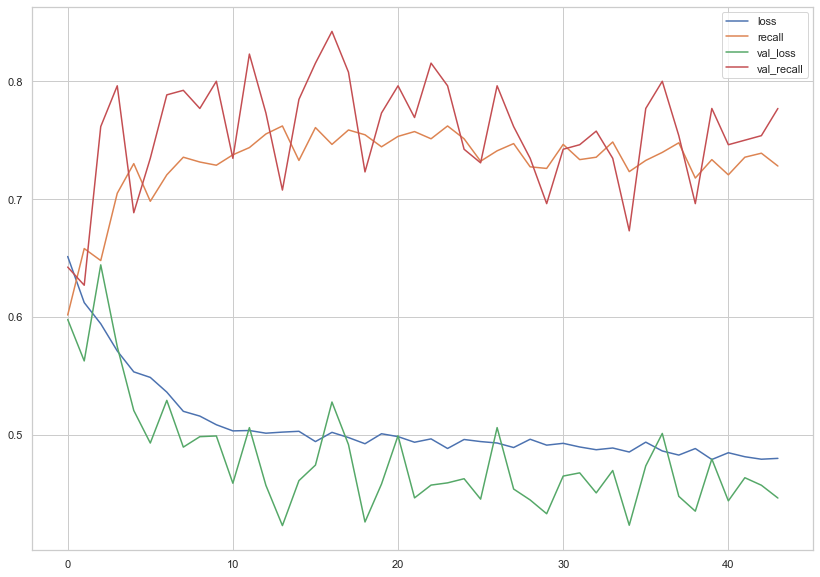

In [77]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [78]:
print('Training Dataset')
y_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))


print("Testing Dataset")
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Training Dataset
226/226 [==============================] - 1s 3ms/step
[[4773  981]
 [ 431 1040]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      5754
           1       0.51      0.71      0.60      1471

    accuracy                           0.80      7225
   macro avg       0.72      0.77      0.73      7225
weighted avg       0.84      0.80      0.82      7225

Testing Dataset
47/47 [==============================] - 0s 3ms/step
[[983 211]
 [ 91 215]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1194
           1       0.50      0.70      0.59       306

    accuracy                           0.80      1500
   macro avg       0.71      0.76      0.73      1500
weighted avg       0.83      0.80      0.81      1500



#### With an early stop and monitring the val_loss, recall for calss 1 is amlost the same and so is the precision. 

In [79]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
loss, accuracy

(0.44291821122169495, 0.7026143670082092)

In [80]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Make predictions on the validation set
y_pred = model.predict(X_val).ravel()

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc}")

40/40 [==============================] - 0s 3ms/step
AUC: 0.8573209549071619


AUC: 0.8573209549071619


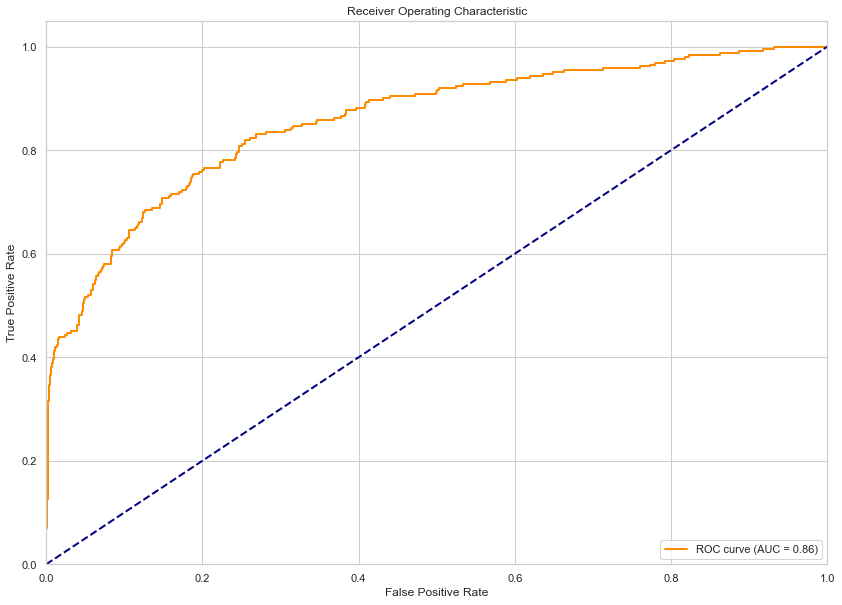

In [81]:
print(f"AUC: {roc_auc}")


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### Monitor the "val_recall" as metric

In [82]:

tf.random.set_seed(seed)

# Create a Sequential model
model = Sequential()
model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.3))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(1, activation="sigmoid"))





In [83]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss="binary_crossentropy",
    metrics=["accuracy", tf.keras.metrics.Recall(name="Recall")])

In [84]:

early_stopping = EarlyStopping(
    monitor='val_Recall', 
    patience=30,   
    mode= "max",
    restore_best_weights=True  
)




In [85]:
# Train the model with class weights and custom early stopping
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=200,
    verbose=1,
    validation_data=(X_val, y_val),
    class_weight=class_weight_dict,
    callbacks=[early_stopping]  
)


Epoch 1/200
226/226 [==============================] - 4s 9ms/step - loss: 0.6481 - accuracy: 0.6068 - Recall: 0.6513 - val_loss: 0.5386 - val_accuracy: 0.7114 - val_Recall: 0.5885
Epoch 2/200
226/226 [==============================] - 1s 6ms/step - loss: 0.5993 - accuracy: 0.6745 - Recall: 0.6982 - val_loss: 0.5293 - val_accuracy: 0.7537 - val_Recall: 0.6962
Epoch 3/200
226/226 [==============================] - 1s 6ms/step - loss: 0.5758 - accuracy: 0.7132 - Recall: 0.6832 - val_loss: 0.6797 - val_accuracy: 0.5914 - val_Recall: 0.8731
Epoch 4/200
226/226 [==============================] - 1s 6ms/step - loss: 0.5549 - accuracy: 0.7325 - Recall: 0.7131 - val_loss: 0.5639 - val_accuracy: 0.7082 - val_Recall: 0.8192
Epoch 5/200
226/226 [==============================] - 1s 6ms/step - loss: 0.5460 - accuracy: 0.7376 - Recall: 0.7179 - val_loss: 0.4513 - val_accuracy: 0.7725 - val_Recall: 0.6654
Epoch 6/200
226/226 [==============================] - 1s 6ms/step - loss: 0.5328 - accuracy: 0

In [86]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 32)                448       
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_21 (Dense)            (None, 18)                594       
                                                                 
 dropout_7 (Dropout)         (None, 18)                0         
                                                                 
 dense_22 (Dense)            (None, 9)                 171       
                                                                 
 dropout_8 (Dropout)         (None, 9)                 0         
                                                                 
 dense_23 (Dense)            (None, 1)                

<Axes: >

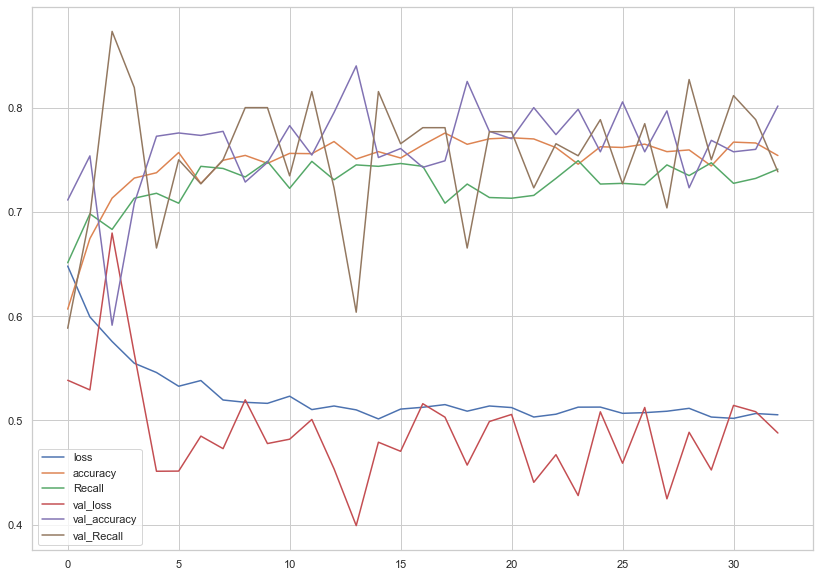

In [87]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [88]:
print('Training Dataset')
y_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))


print("Testing Dataset")
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Training Dataset
226/226 [==============================] - 1s 3ms/step
[[2936 2818]
 [ 134 1337]]
              precision    recall  f1-score   support

           0       0.96      0.51      0.67      5754
           1       0.32      0.91      0.48      1471

    accuracy                           0.59      7225
   macro avg       0.64      0.71      0.57      7225
weighted avg       0.83      0.59      0.63      7225

Testing Dataset
47/47 [==============================] - 0s 3ms/step
[[594 600]
 [ 34 272]]
              precision    recall  f1-score   support

           0       0.95      0.50      0.65      1194
           1       0.31      0.89      0.46       306

    accuracy                           0.58      1500
   macro avg       0.63      0.69      0.56      1500
weighted avg       0.82      0.58      0.61      1500



#### With an early stop and monitring the val_recall we got a high increase of recall for class 1 from 70 to 89. But a huge decrease of precision on the other hand, which is expected.

In [89]:
results = model.evaluate(X_test, y_test, verbose=0)
loss = results[0]
accuracy = results[1]
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.6944860219955444
accuracy:  0.5773333311080933


In [90]:

evaluation = model.evaluate(X_test, y_test)

loss = evaluation[0]
accuracy = evaluation[1]
recall = evaluation[2]

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Recall: {recall:.4f}")

47/47 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.5773 - Recall: 0.8889
Test Loss: 0.6945
Test Accuracy: 0.5773
Test Recall: 0.8889


In [91]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

y_pred = model.predict(X_val).ravel()

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc}")

40/40 [==============================] - 0s 3ms/step
AUC: 0.8066123531640772


AUC: 0.8066123531640772


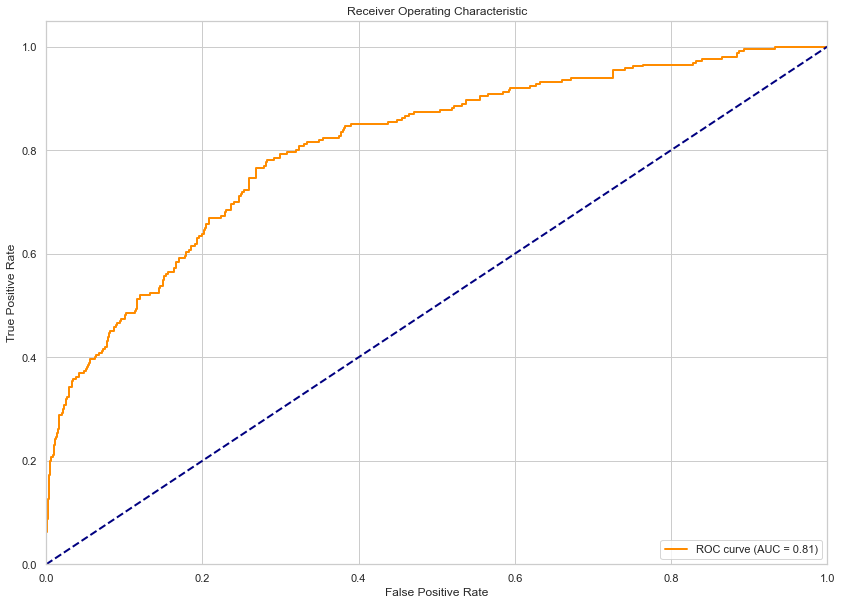

In [92]:
print(f"AUC: {roc_auc}")


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Optuna

In [93]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=25, restore_best_weights=True
)

In [94]:
trial_metric = "Recall"
batch_size = 64

def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_float("w0", 0.01, 5, log= True)
    w1 = trial.suggest_float("w1", 0.01, 5, log = True)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=200,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=1,
    )
    
    

    
  
 
    #score_train = model.evaluate(X_val, y_val, verbose=0)["Recall"]
    score_train = model.evaluate(X_train, y_train, verbose=0)[1]
    return score_train 


#score_train = model.evaluate(X_val, y_val, verbose=0)[1]
#score_test = model_evaluate(X_test, y_test, verbose=0)[1]
#w0 = trial.suggest_float("w0", 0.01, 5, log = True)

In [95]:

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-10-30 19:40:45,818] A new study created in memory with name: no-name-61dff25e-368c-4c54-babd-f496ffed8eab
C:\Users\solid\anaconda3\envs\tf_new\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_v2.adam.Adam'> which is of type type.
  warnings.warn(message)
C:\Users\solid\anaconda3\envs\tf_new\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
C:\Users\solid\anaconda3\envs\tf_new\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'ke

Epoch 1/200
113/113 [==============================] - 3s 11ms/step - loss: 0.2834 - recall: 0.0000e+00 - val_loss: 0.6239 - val_recall: 0.0000e+00
Epoch 2/200
113/113 [==============================] - 1s 6ms/step - loss: 0.2807 - recall: 0.0000e+00 - val_loss: 0.6296 - val_recall: 0.0000e+00
Epoch 3/200
113/113 [==============================] - 1s 6ms/step - loss: 0.2780 - recall: 0.0014 - val_loss: 0.6354 - val_recall: 0.0077
Epoch 4/200
113/113 [==============================] - 1s 6ms/step - loss: 0.2753 - recall: 0.0075 - val_loss: 0.6413 - val_recall: 0.0077
Epoch 5/200
113/113 [==============================] - 1s 5ms/step - loss: 0.2728 - recall: 0.0292 - val_loss: 0.6473 - val_recall: 0.0500
Epoch 6/200
113/113 [==============================] - 1s 6ms/step - loss: 0.2703 - recall: 0.0714 - val_loss: 0.6534 - val_recall: 0.1000
Epoch 7/200
113/113 [==============================] - 1s 6ms/step - loss: 0.2679 - recall: 0.1237 - val_loss: 0.6596 - val_recall: 0.1308
Epoch 8/20

[I 2023-10-30 19:41:06,278] Trial 0 finished with value: 0.0 and parameters: {'n_units1': 49, 'n_units2': 123, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 0.003460723107075495, 'w0': 0.1289776063157902, 'w1': 1.3356875090602476}. Best is trial 0 with value: 0.0.


Epoch 1/200
113/113 [==============================] - 4s 13ms/step - loss: 0.0561 - recall: 0.9694 - val_loss: 0.9371 - val_recall: 0.9154
Epoch 2/200
113/113 [==============================] - 1s 7ms/step - loss: 0.0494 - recall: 0.9599 - val_loss: 0.9483 - val_recall: 0.9808
Epoch 3/200
113/113 [==============================] - 1s 5ms/step - loss: 0.0460 - recall: 0.9511 - val_loss: 1.1092 - val_recall: 0.9769
Epoch 4/200
113/113 [==============================] - 1s 5ms/step - loss: 0.0447 - recall: 0.9524 - val_loss: 1.1123 - val_recall: 0.9846
Epoch 5/200
113/113 [==============================] - 1s 5ms/step - loss: 0.0442 - recall: 0.9558 - val_loss: 0.8499 - val_recall: 0.9462
Epoch 6/200
113/113 [==============================] - 1s 6ms/step - loss: 0.0435 - recall: 0.9395 - val_loss: 1.3638 - val_recall: 0.9731
Epoch 7/200
113/113 [==============================] - 1s 6ms/step - loss: 0.0436 - recall: 0.9381 - val_loss: 0.8487 - val_recall: 0.9500
Epoch 8/200
113/113 [=====

[I 2023-10-30 19:41:38,918] Trial 1 finished with value: 0.8932698965072632 and parameters: {'n_units1': 70, 'n_units2': 33, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.02405188837578857, 'w0': 0.030823822378717242, 'w1': 0.43047444464504653}. Best is trial 1 with value: 0.8932698965072632.


Epoch 1/200
113/113 [==============================] - 3s 12ms/step - loss: 0.0251 - recall: 0.9524 - val_loss: 0.7782 - val_recall: 0.8769
Epoch 2/200
113/113 [==============================] - 1s 6ms/step - loss: 0.0231 - recall: 0.9205 - val_loss: 0.8675 - val_recall: 0.9346
Epoch 3/200
113/113 [==============================] - 1s 6ms/step - loss: 0.0219 - recall: 0.9232 - val_loss: 0.9400 - val_recall: 0.9308
Epoch 4/200
113/113 [==============================] - 1s 6ms/step - loss: 0.0211 - recall: 0.9211 - val_loss: 0.9441 - val_recall: 0.9538
Epoch 5/200
113/113 [==============================] - 1s 6ms/step - loss: 0.0206 - recall: 0.9191 - val_loss: 0.7081 - val_recall: 0.8962
Epoch 6/200
113/113 [==============================] - 1s 6ms/step - loss: 0.0200 - recall: 0.9116 - val_loss: 0.9830 - val_recall: 0.9423
Epoch 7/200
113/113 [==============================] - 1s 6ms/step - loss: 0.0199 - recall: 0.9123 - val_loss: 0.7336 - val_recall: 0.9077
Epoch 8/200
113/113 [=====

[I 2023-10-30 19:42:19,340] Trial 2 finished with value: 0.8633582592010498 and parameters: {'n_units1': 65, 'n_units2': 119, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.0025683428486939063, 'w0': 0.016486676261668408, 'w1': 0.16571313997256368}. Best is trial 1 with value: 0.8932698965072632.


Epoch 1/200
113/113 [==============================] - 4s 11ms/step - loss: 0.1852 - recall: 0.0523 - val_loss: 0.6202 - val_recall: 0.0000e+00
Epoch 2/200
113/113 [==============================] - 1s 5ms/step - loss: 0.1677 - recall: 0.0000e+00 - val_loss: 0.5868 - val_recall: 0.0000e+00
Epoch 3/200
113/113 [==============================] - 1s 5ms/step - loss: 0.1506 - recall: 0.0000e+00 - val_loss: 0.5575 - val_recall: 0.0000e+00
Epoch 4/200
113/113 [==============================] - 1s 6ms/step - loss: 0.1340 - recall: 0.0000e+00 - val_loss: 0.5341 - val_recall: 0.0000e+00
Epoch 5/200
113/113 [==============================] - 1s 5ms/step - loss: 0.1187 - recall: 0.0000e+00 - val_loss: 0.5186 - val_recall: 0.0000e+00
Epoch 6/200
113/113 [==============================] - 1s 5ms/step - loss: 0.1052 - recall: 0.0000e+00 - val_loss: 0.5123 - val_recall: 0.0000e+00
Epoch 7/200
113/113 [==============================] - 1s 5ms/step - loss: 0.0943 - recall: 0.0000e+00 - val_loss: 0.5151

[I 2023-10-30 19:42:44,007] Trial 3 finished with value: 0.0 and parameters: {'n_units1': 15, 'n_units2': 71, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 4.665703442513123e-05, 'w0': 0.35833230930445065, 'w1': 0.08880096095870159}. Best is trial 1 with value: 0.8932698965072632.


Epoch 1/200
113/113 [==============================] - 5s 12ms/step - loss: 0.2003 - recall: 0.0979 - val_loss: 0.6137 - val_recall: 0.0000e+00
Epoch 2/200
113/113 [==============================] - 1s 6ms/step - loss: 0.1741 - recall: 0.0000e+00 - val_loss: 0.5667 - val_recall: 0.0000e+00
Epoch 3/200
113/113 [==============================] - 1s 5ms/step - loss: 0.1514 - recall: 0.0000e+00 - val_loss: 0.5323 - val_recall: 0.0000e+00
Epoch 4/200
113/113 [==============================] - 1s 5ms/step - loss: 0.1329 - recall: 0.0000e+00 - val_loss: 0.5134 - val_recall: 0.0000e+00
Epoch 5/200
113/113 [==============================] - 1s 6ms/step - loss: 0.1193 - recall: 0.0000e+00 - val_loss: 0.5085 - val_recall: 0.0000e+00
Epoch 6/200
113/113 [==============================] - 1s 6ms/step - loss: 0.1103 - recall: 0.0000e+00 - val_loss: 0.5132 - val_recall: 0.0000e+00
Epoch 7/200
113/113 [==============================] - 1s 6ms/step - loss: 0.1050 - recall: 0.0000e+00 - val_loss: 0.5220

[I 2023-10-30 19:43:09,218] Trial 4 finished with value: 0.0 and parameters: {'n_units1': 21, 'n_units2': 89, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 4.297653219688655e-05, 'w0': 0.36553438938144484, 'w1': 0.14640922476717053}. Best is trial 1 with value: 0.8932698965072632.


Epoch 1/200
113/113 [==============================] - 3s 11ms/step - loss: 0.2221 - recall: 0.0088 - val_loss: 0.9532 - val_recall: 0.0000e+00
Epoch 2/200
113/113 [==============================] - 1s 5ms/step - loss: 0.1051 - recall: 0.0000e+00 - val_loss: 0.9243 - val_recall: 0.0000e+00
Epoch 3/200
113/113 [==============================] - 0s 3ms/step - loss: 0.1025 - recall: 0.0000e+00 - val_loss: 0.8504 - val_recall: 0.0000e+00
Epoch 4/200
113/113 [==============================] - 0s 4ms/step - loss: 0.1012 - recall: 0.0000e+00 - val_loss: 0.8544 - val_recall: 0.0000e+00
Epoch 5/200
113/113 [==============================] - 1s 6ms/step - loss: 0.1001 - recall: 0.0000e+00 - val_loss: 0.8837 - val_recall: 0.0000e+00
Epoch 6/200
113/113 [==============================] - 1s 6ms/step - loss: 0.0992 - recall: 0.0000e+00 - val_loss: 0.8445 - val_recall: 0.0000e+00
Epoch 7/200
113/113 [==============================] - 1s 6ms/step - loss: 0.0988 - recall: 0.0000e+00 - val_loss: 0.8536

113/113 [==============================] - 1s 5ms/step - loss: 0.0811 - recall: 0.1149 - val_loss: 0.6509 - val_recall: 0.1308
Epoch 60/200
113/113 [==============================] - 1s 5ms/step - loss: 0.0809 - recall: 0.1101 - val_loss: 0.7535 - val_recall: 0.1038
Epoch 61/200
113/113 [==============================] - 1s 5ms/step - loss: 0.0802 - recall: 0.1203 - val_loss: 0.5688 - val_recall: 0.1654
Epoch 62/200
113/113 [==============================] - 1s 5ms/step - loss: 0.0803 - recall: 0.1264 - val_loss: 0.6480 - val_recall: 0.1308
Epoch 63/200
113/113 [==============================] - 1s 5ms/step - loss: 0.0808 - recall: 0.1115 - val_loss: 0.7009 - val_recall: 0.1192
Epoch 64/200
113/113 [==============================] - 1s 5ms/step - loss: 0.0804 - recall: 0.1196 - val_loss: 0.6231 - val_recall: 0.1385
Epoch 65/200
113/113 [==============================] - 1s 5ms/step - loss: 0.0806 - recall: 0.1162 - val_loss: 0.6058 - val_recall: 0.1462
Epoch 66/200
113/113 [===========

[I 2023-10-30 19:44:09,673] Trial 5 finished with value: 0.15023793280124664 and parameters: {'n_units1': 11, 'n_units2': 76, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.0020091431480592243, 'w0': 2.4100778625854016, 'w1': 0.09544633293890131}. Best is trial 1 with value: 0.8932698965072632.


Epoch 1/200
113/113 [==============================] - 3s 11ms/step - loss: 0.1606 - recall: 0.9742 - val_loss: 0.9490 - val_recall: 0.9500
Epoch 2/200
113/113 [==============================] - 1s 5ms/step - loss: 0.1466 - recall: 0.9470 - val_loss: 0.8554 - val_recall: 0.9038
Epoch 3/200
113/113 [==============================] - 1s 6ms/step - loss: 0.1454 - recall: 0.9164 - val_loss: 1.1109 - val_recall: 0.9462
Epoch 4/200
113/113 [==============================] - 1s 5ms/step - loss: 0.1424 - recall: 0.9245 - val_loss: 0.9726 - val_recall: 0.9308
Epoch 5/200
113/113 [==============================] - 1s 6ms/step - loss: 0.1316 - recall: 0.9327 - val_loss: 0.7734 - val_recall: 0.9038
Epoch 6/200
113/113 [==============================] - 1s 5ms/step - loss: 0.1278 - recall: 0.9089 - val_loss: 0.6134 - val_recall: 0.8269
Epoch 7/200
113/113 [==============================] - 1s 5ms/step - loss: 0.1271 - recall: 0.9232 - val_loss: 0.7904 - val_recall: 0.8923
Epoch 8/200
113/113 [=====

[I 2023-10-30 19:44:44,267] Trial 6 finished with value: 0.8477226495742798 and parameters: {'n_units1': 66, 'n_units2': 25, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 0.063331845982314, 'w0': 0.09663530557449379, 'w1': 1.0466745396280874}. Best is trial 1 with value: 0.8932698965072632.


Epoch 1/200
113/113 [==============================] - 3s 15ms/step - loss: 0.6562 - recall: 0.0639 - val_loss: 0.4968 - val_recall: 0.0000e+00
Epoch 2/200
113/113 [==============================] - 1s 6ms/step - loss: 0.5323 - recall: 0.0000e+00 - val_loss: 0.4780 - val_recall: 0.0000e+00
Epoch 3/200
113/113 [==============================] - 1s 6ms/step - loss: 0.5204 - recall: 0.0000e+00 - val_loss: 0.4697 - val_recall: 0.0000e+00
Epoch 4/200
113/113 [==============================] - 1s 6ms/step - loss: 0.5066 - recall: 0.0048 - val_loss: 0.4551 - val_recall: 0.0038
Epoch 5/200
113/113 [==============================] - 1s 6ms/step - loss: 0.4896 - recall: 0.0224 - val_loss: 0.4395 - val_recall: 0.0385
Epoch 6/200
113/113 [==============================] - 1s 6ms/step - loss: 0.4760 - recall: 0.0585 - val_loss: 0.4251 - val_recall: 0.1462
Epoch 7/200
113/113 [==============================] - 1s 6ms/step - loss: 0.4641 - recall: 0.1054 - val_loss: 0.4174 - val_recall: 0.1577
Epoch 

113/113 [==============================] - 1s 6ms/step - loss: 0.3660 - recall: 0.4052 - val_loss: 0.3528 - val_recall: 0.3923
Epoch 60/200
113/113 [==============================] - 1s 6ms/step - loss: 0.3636 - recall: 0.4058 - val_loss: 0.3426 - val_recall: 0.4308
Epoch 61/200
113/113 [==============================] - 1s 6ms/step - loss: 0.3632 - recall: 0.3923 - val_loss: 0.3462 - val_recall: 0.4231
Epoch 62/200
113/113 [==============================] - 1s 6ms/step - loss: 0.3621 - recall: 0.4024 - val_loss: 0.3393 - val_recall: 0.4692
Epoch 63/200
113/113 [==============================] - 1s 6ms/step - loss: 0.3637 - recall: 0.4038 - val_loss: 0.3462 - val_recall: 0.4154
Epoch 64/200
113/113 [==============================] - 1s 6ms/step - loss: 0.3627 - recall: 0.4018 - val_loss: 0.3444 - val_recall: 0.4308
Epoch 65/200
113/113 [==============================] - 1s 6ms/step - loss: 0.3621 - recall: 0.4045 - val_loss: 0.3465 - val_recall: 0.4269
Epoch 66/200
113/113 [===========

[I 2023-10-30 19:45:38,819] Trial 7 finished with value: 0.4595513343811035 and parameters: {'n_units1': 109, 'n_units2': 48, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 0.00040435683715317624, 'w0': 1.4622131884635485, 'w1': 0.9610705437972888}. Best is trial 1 with value: 0.8932698965072632.


Epoch 1/200
113/113 [==============================] - 4s 11ms/step - loss: 0.1278 - recall: 6.7981e-04 - val_loss: 0.5577 - val_recall: 0.0000e+00
Epoch 2/200
113/113 [==============================] - 1s 6ms/step - loss: 0.1104 - recall: 0.0000e+00 - val_loss: 0.5427 - val_recall: 0.0000e+00
Epoch 3/200
113/113 [==============================] - 1s 6ms/step - loss: 0.1065 - recall: 0.0000e+00 - val_loss: 0.5014 - val_recall: 0.0000e+00
Epoch 4/200
113/113 [==============================] - 1s 6ms/step - loss: 0.1035 - recall: 0.0014 - val_loss: 0.4902 - val_recall: 0.0000e+00
Epoch 5/200
113/113 [==============================] - 1s 6ms/step - loss: 0.0996 - recall: 0.0136 - val_loss: 0.4859 - val_recall: 0.0115
Epoch 6/200
113/113 [==============================] - 1s 6ms/step - loss: 0.0941 - recall: 0.0646 - val_loss: 0.4396 - val_recall: 0.1192
Epoch 7/200
113/113 [==============================] - 1s 6ms/step - loss: 0.0902 - recall: 0.1305 - val_loss: 0.4256 - val_recall: 0.184

113/113 [==============================] - 1s 6ms/step - loss: 0.0777 - recall: 0.3134 - val_loss: 0.4165 - val_recall: 0.2962
Epoch 60/200
113/113 [==============================] - 1s 6ms/step - loss: 0.0772 - recall: 0.3182 - val_loss: 0.4293 - val_recall: 0.3115
Epoch 61/200
113/113 [==============================] - 1s 6ms/step - loss: 0.0776 - recall: 0.3120 - val_loss: 0.3808 - val_recall: 0.3423
Epoch 62/200
113/113 [==============================] - 1s 6ms/step - loss: 0.0769 - recall: 0.3215 - val_loss: 0.3737 - val_recall: 0.3615
Epoch 63/200
113/113 [==============================] - 1s 6ms/step - loss: 0.0771 - recall: 0.3120 - val_loss: 0.3951 - val_recall: 0.3385
Epoch 64/200
113/113 [==============================] - 1s 6ms/step - loss: 0.0771 - recall: 0.3182 - val_loss: 0.3855 - val_recall: 0.3577
Epoch 65/200
113/113 [==============================] - 1s 6ms/step - loss: 0.0770 - recall: 0.3154 - val_loss: 0.3839 - val_recall: 0.3462
Epoch 65: early stopping


[I 2023-10-30 19:46:26,835] Trial 8 finished with value: 0.3990482687950134 and parameters: {'n_units1': 57, 'n_units2': 72, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.0012668530572190685, 'w0': 0.5475699550386424, 'w1': 0.1618783082715748}. Best is trial 1 with value: 0.8932698965072632.


Epoch 1/200
113/113 [==============================] - 3s 11ms/step - loss: 0.0283 - recall: 0.5602 - val_loss: 0.7008 - val_recall: 0.5538
Epoch 2/200
113/113 [==============================] - 1s 5ms/step - loss: 0.0282 - recall: 0.5357 - val_loss: 0.6976 - val_recall: 0.5154
Epoch 3/200
113/113 [==============================] - 1s 5ms/step - loss: 0.0280 - recall: 0.5119 - val_loss: 0.6943 - val_recall: 0.4692
Epoch 4/200
113/113 [==============================] - 1s 5ms/step - loss: 0.0278 - recall: 0.4820 - val_loss: 0.6908 - val_recall: 0.4423
Epoch 5/200
113/113 [==============================] - 1s 5ms/step - loss: 0.0276 - recall: 0.4487 - val_loss: 0.6873 - val_recall: 0.4192
Epoch 6/200
113/113 [==============================] - 1s 5ms/step - loss: 0.0274 - recall: 0.4235 - val_loss: 0.6837 - val_recall: 0.3962
Epoch 7/200
113/113 [==============================] - 1s 5ms/step - loss: 0.0272 - recall: 0.3963 - val_loss: 0.6801 - val_recall: 0.3731
Epoch 8/200
113/113 [=====

Epoch 59/200
113/113 [==============================] - 1s 6ms/step - loss: 0.0177 - recall: 0.0000e+00 - val_loss: 0.5325 - val_recall: 0.0000e+00
Epoch 60/200
113/113 [==============================] - 1s 6ms/step - loss: 0.0176 - recall: 0.0000e+00 - val_loss: 0.5310 - val_recall: 0.0000e+00
Epoch 61/200
113/113 [==============================] - 1s 5ms/step - loss: 0.0174 - recall: 0.0000e+00 - val_loss: 0.5295 - val_recall: 0.0000e+00
Epoch 62/200
113/113 [==============================] - 1s 5ms/step - loss: 0.0173 - recall: 0.0000e+00 - val_loss: 0.5281 - val_recall: 0.0000e+00
Epoch 63/200
113/113 [==============================] - 1s 6ms/step - loss: 0.0172 - recall: 0.0000e+00 - val_loss: 0.5267 - val_recall: 0.0000e+00
Epoch 64/200
113/113 [==============================] - 1s 6ms/step - loss: 0.0171 - recall: 0.0000e+00 - val_loss: 0.5254 - val_recall: 0.0000e+00
Epoch 65/200
113/113 [==============================] - 1s 6ms/step - loss: 0.0169 - recall: 0.0000e+00 - val_lo

113/113 [==============================] - 1s 5ms/step - loss: 0.0135 - recall: 0.0000e+00 - val_loss: 0.5073 - val_recall: 0.0000e+00
Epoch 115/200
113/113 [==============================] - 1s 6ms/step - loss: 0.0134 - recall: 0.0000e+00 - val_loss: 0.5075 - val_recall: 0.0000e+00
Epoch 116/200
113/113 [==============================] - 1s 5ms/step - loss: 0.0134 - recall: 0.0000e+00 - val_loss: 0.5078 - val_recall: 0.0000e+00
Epoch 117/200
113/113 [==============================] - 1s 5ms/step - loss: 0.0134 - recall: 0.0000e+00 - val_loss: 0.5080 - val_recall: 0.0000e+00
Epoch 118/200
113/113 [==============================] - 1s 5ms/step - loss: 0.0133 - recall: 0.0000e+00 - val_loss: 0.5083 - val_recall: 0.0000e+00
Epoch 119/200
113/113 [==============================] - 1s 5ms/step - loss: 0.0133 - recall: 0.0000e+00 - val_loss: 0.5086 - val_recall: 0.0000e+00
Epoch 120/200
113/113 [==============================] - 1s 5ms/step - loss: 0.0133 - recall: 0.0000e+00 - val_loss: 0.5

[I 2023-10-30 19:47:48,200] Trial 9 finished with value: 0.0 and parameters: {'n_units1': 11, 'n_units2': 41, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 0.0031791440077138583, 'w0': 0.04584747429297424, 'w1': 0.017843423625732695}. Best is trial 1 with value: 0.8932698965072632.


{'n_units1': 70,
 'n_units2': 33,
 'optimizer': keras.optimizers.optimizer_v2.rmsprop.RMSprop,
 'learning_rate': 0.02405188837578857,
 'w0': 0.030823822378717242,
 'w1': 0.43047444464504653}

In [96]:
# build model with optuna parameters
unit1, unit2,optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)
#tf.random.set_seed(42)
model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=60,
    epochs=200,
    callbacks=[early_stop],
    #class_weight={0:0.6278314, 1:w1},
    #class_weight={0:0.03567341869069141, 1:0.41768192676630142},
    class_weight={0: w0, 1: w1},
    verbose=1,
)

    
    

    

Epoch 1/200
121/121 [==============================] - 4s 11ms/step - loss: 0.0541 - recall: 0.9667 - val_loss: 1.2939 - val_recall: 0.9769
Epoch 2/200
121/121 [==============================] - 1s 5ms/step - loss: 0.0476 - recall: 0.9504 - val_loss: 1.4034 - val_recall: 1.0000
Epoch 3/200
121/121 [==============================] - 1s 5ms/step - loss: 0.0453 - recall: 0.9497 - val_loss: 0.9171 - val_recall: 0.9423
Epoch 4/200
121/121 [==============================] - 1s 5ms/step - loss: 0.0447 - recall: 0.9422 - val_loss: 1.1403 - val_recall: 0.9885
Epoch 5/200
121/121 [==============================] - 1s 5ms/step - loss: 0.0450 - recall: 0.9517 - val_loss: 0.9948 - val_recall: 0.9692
Epoch 6/200
121/121 [==============================] - 1s 5ms/step - loss: 0.0437 - recall: 0.9490 - val_loss: 1.3180 - val_recall: 0.9962
Epoch 7/200
121/121 [==============================] - 1s 5ms/step - loss: 0.0437 - recall: 0.9483 - val_loss: 0.8115 - val_recall: 0.9269
Epoch 8/200
121/121 [=====

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [97]:
history = model.history.history

In [98]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 3ms/step
[[898 296]
 [ 73 233]]
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1194
           1       0.44      0.76      0.56       306

    accuracy                           0.75      1500
   macro avg       0.68      0.76      0.69      1500
weighted avg       0.83      0.75      0.77      1500



47/47 [==============================] - 0s 3ms/step


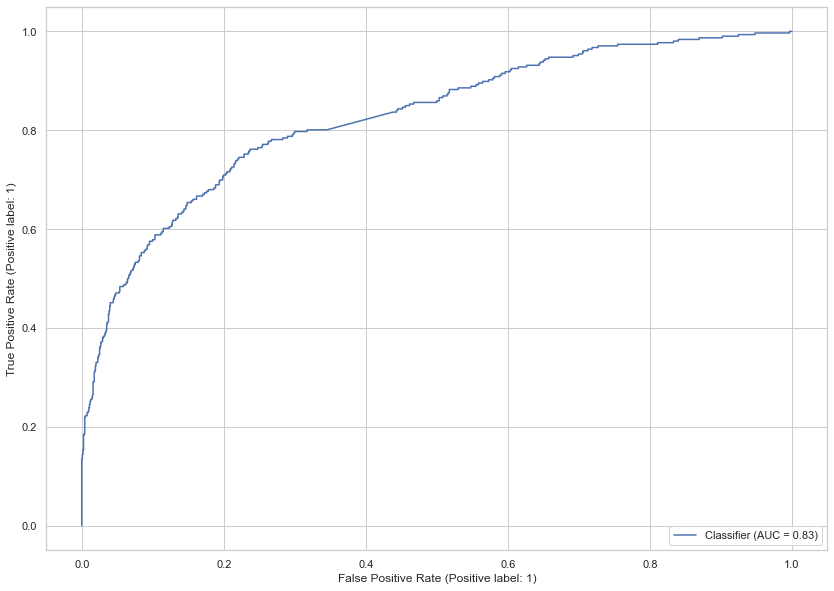

In [99]:
#ROC and AUC
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [100]:
roc_auc_score(y_test, y_pred_proba)

0.8258845972783306

# Final Model and Model Deployment

In [101]:
import pickle

pickle.dump(scaler, open("scaler_churn", "wb"))

In [102]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [103]:
Gender = pd.get_dummies(X['Gender'])
X = pd.concat([X, Gender], axis=1)
X = X.drop('Gender', axis=1)

In [104]:

Geography = pd.get_dummies(X['Geography'])
X = pd.concat([X, Geography], axis=1)
X = X.drop('Geography', axis=1)

In [105]:
X_train, X_test, y_train, y_test =train_test_split(X,y,stratify=y, test_size=0.15, random_state=42)

In [106]:

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#X_val = scaler.transform(X_val)

In [107]:
# now we will use the best paramaters optuna found and apply it
study.best_params

{'n_units1': 70,
 'n_units2': 33,
 'optimizer': keras.optimizers.optimizer_v2.rmsprop.RMSprop,
 'learning_rate': 0.02405188837578857,
 'w0': 0.030823822378717242,
 'w1': 0.43047444464504653}

In [108]:
# create our model with best paramaters 
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.02405188837578857)

model = Sequential()

model.add(Dense(70, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(33, activation = "relu"))

model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = ["Recall"]),

#model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss="binary_crossentropy",metrics=["accuracy", tf.keras.metrics.Recall(name="Recall")])

(None,)

In [109]:

early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=30,
    mode = "min",
    restore_best_weights=True  
)

In [110]:
model.fit(x=X_train, y= y_train,
         validation_data=(X_test, y_test),
         batch_size= 32,
         epochs=200,
         verbose=1,
          callbacks=[early_stopping],
         class_weight= {0:0.030823822378717242, 1:0.43047444464504653} )


Epoch 1/200
266/266 [==============================] - 4s 7ms/step - loss: 0.0527 - recall: 0.9740 - val_loss: 0.7285 - val_recall: 0.8497
Epoch 2/200
266/266 [==============================] - 1s 5ms/step - loss: 0.0464 - recall: 0.9370 - val_loss: 1.2369 - val_recall: 0.9902
Epoch 3/200
266/266 [==============================] - 1s 5ms/step - loss: 0.0456 - recall: 0.9434 - val_loss: 0.8350 - val_recall: 0.9183
Epoch 4/200
266/266 [==============================] - 1s 5ms/step - loss: 0.0449 - recall: 0.9318 - val_loss: 0.8347 - val_recall: 0.9118
Epoch 5/200
266/266 [==============================] - 1s 5ms/step - loss: 0.0450 - recall: 0.9318 - val_loss: 0.8617 - val_recall: 0.9706
Epoch 6/200
266/266 [==============================] - 1s 5ms/step - loss: 0.0439 - recall: 0.9388 - val_loss: 0.7888 - val_recall: 0.9314
Epoch 7/200
266/266 [==============================] - 1s 5ms/step - loss: 0.0440 - recall: 0.9411 - val_loss: 0.6885 - val_recall: 0.8954
Epoch 8/200
266/266 [======

266/266 [==============================] - 1s 5ms/step - loss: 0.0449 - recall: 0.9653 - val_loss: 1.1090 - val_recall: 0.9641
Epoch 60/200
266/266 [==============================] - 1s 5ms/step - loss: 0.0474 - recall: 0.9648 - val_loss: 0.9392 - val_recall: 0.9608
Epoch 61/200
266/266 [==============================] - 1s 5ms/step - loss: 0.0446 - recall: 0.9549 - val_loss: 0.9678 - val_recall: 0.9641
Epoch 62/200
266/266 [==============================] - 1s 5ms/step - loss: 0.0454 - recall: 0.9642 - val_loss: 0.8042 - val_recall: 0.9935
Epoch 63/200
266/266 [==============================] - 1s 5ms/step - loss: 0.0455 - recall: 0.9636 - val_loss: 0.6374 - val_recall: 0.8301
Epoch 64/200
266/266 [==============================] - 1s 5ms/step - loss: 0.0450 - recall: 0.9613 - val_loss: 0.8437 - val_recall: 0.9477
Epoch 65/200
266/266 [==============================] - 1s 5ms/step - loss: 0.0450 - recall: 0.9590 - val_loss: 1.0829 - val_recall: 0.9379
Epoch 66/200
266/266 [===========

<Axes: >

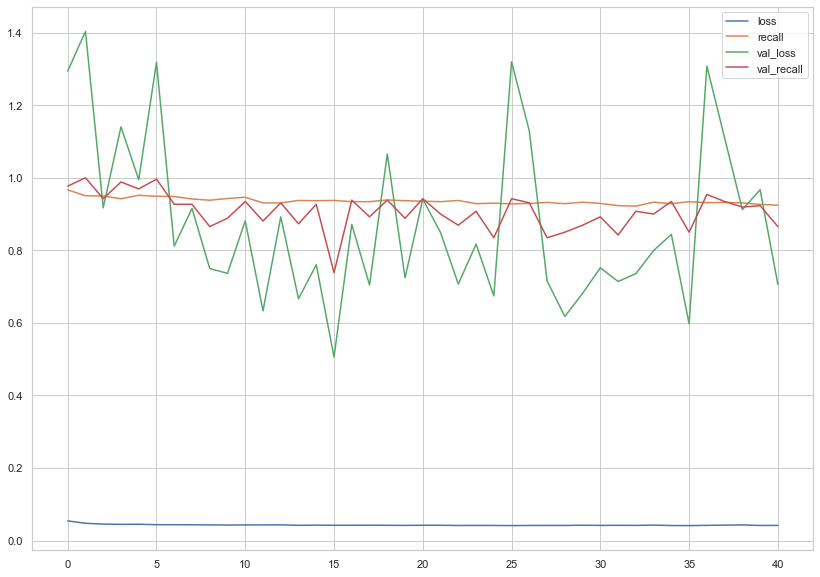

In [111]:
loss_df = pd.DataFrame(history)
loss_df.plot()

In [112]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.5809044241905212
recall:  0.8725489974021912


In [113]:
print('Training Dataset')
y_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))


print("Testing Dataset")
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Training Dataset
266/266 [==============================] - 1s 3ms/step
[[3698 3071]
 [ 186 1545]]
              precision    recall  f1-score   support

           0       0.95      0.55      0.69      6769
           1       0.33      0.89      0.49      1731

    accuracy                           0.62      8500
   macro avg       0.64      0.72      0.59      8500
weighted avg       0.83      0.62      0.65      8500

Testing Dataset
47/47 [==============================] - 0s 3ms/step
[[643 551]
 [ 39 267]]
              precision    recall  f1-score   support

           0       0.94      0.54      0.69      1194
           1       0.33      0.87      0.48       306

    accuracy                           0.61      1500
   macro avg       0.63      0.71      0.58      1500
weighted avg       0.82      0.61      0.64      1500



In [114]:
model.save("churn_model.h5")

### Loadding the model

In [115]:
from tensorflow.keras.models import load_model
#tf.keras.models.load_model("churn_model.h5")

In [116]:
#Loading the model from Pickle
churn_model = load_model("churn_model.h5")
scaler_churn = pickle.load(open("scaler_churn", "rb"))

## Prediction

In [128]:
X_scaled = scaler_churn.fit_transform(X)

In [129]:
predictions = (churn_model.predict(X_scaled) > 0.5).astype(int)

313/313 [==============================] - 1s 3ms/step


In [132]:
print(predictions)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [1]]


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___